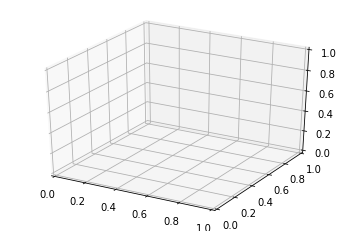

In [1]:
import scipy
import bravais 
import numpy as np
import matplotlib.pyplot as plt
from spatial_sites import Sites, vector_direction_setter
from bravais import BravaisLattice

from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [2]:
#lets make a face centered cubic lattice for Nickel, with a= 0.352nm
fcc_lat = BravaisLattice('cubic', 'F',a=0.352,b=0.352,c=0.352)
print(fcc_lat)
lattice_sites = fcc_lat.sites


F-centred cubic lattice (a=0.3520, b=0.3520, c=0.3520, alpha=90.00, beta=90.00, gamma=90.00)


In [3]:
print("lattice_sites type:", type(lattice_sites))
print("lattice vectors:",lattice_sites)
#these are the coordinates of the 4 points which make up the unit cell of a FCC cubic structure"

lattice_sites type: <class 'dict'>
lattice vectors: {'lattice_sites': Sites(
    dimension=3,
    vector_direction='column',
    component_labels=['x', 'y', 'z'],
    coords=array([[0. , 0.5, 0.5, 0. ],
                  [0. , 0.5, 0. , 0.5],
                  [0. , 0. , 0.5, 0.5]]),
    labels={},
)}


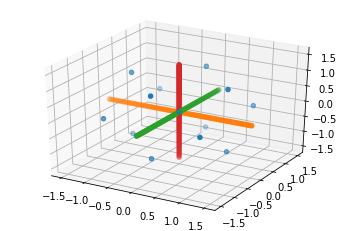

In [4]:
#not sure that the above method is useful since we already know the coordinates of the nearest neighbors.  I do not think we should ever have to generate lattice vectors; they should be an input to the program.
#define the vectors for the 12nearest neighbors in the fcc structure
a=2 #nm
a2=a/2
r1= [0,0,0]
r2= np.multiply(a2,[1,1,0])
r3= np.multiply(a2,[-1,-1,0])
r4= np.multiply(a2,[1,-1,0])
r5= np.multiply(a2,[-1,1,0])
r6= np.multiply(a2,[1,0,1])
r7= np.multiply(a2,[-1,0,-1])
r8= np.multiply(a2,[-1,0,1])
r9= np.multiply(a2,[1,0,-1])
r10= np.multiply(a2,[0,-1,1])
r11= np.multiply(a2,[0,1,1])
r12= np.multiply(a2,[0,1,-1]) 
r13= np.multiply(a2,[0,-1,-1]) 

nn= np.array([r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13])
nnx = [0,1,-1,1,-1,1,-1,-1,1,0,0,0,0]
nny = [0,1, -1, -1, 1, 0, 0, 0, 0, -1, 1, 1,-1]
nnz=  [0, 0, 0, 0, 0, 1, -1, 1, -1, 1, 1, -1,-1]

#to plot the xyz axes 
xx = np.linspace(-1.5,1.5,100)
yy = np.linspace(-1.5,1.5,100)
zz = np.linspace(-1.5,1.5,100)
zeros = np.zeros(100)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(nnx,nny,nnz)
ax.scatter3D(xx,zeros,zeros)
ax.scatter3D(zeros,yy,zeros)
ax.scatter3D(zeros,zeros,zz)

plt.savefig('fcc_lattice.png')


plt.show()

In [10]:
#i will now attempt to create the 12 nearest neighbors of the FCC lattice using inversion symmetry
nearest_raw = lattice_sites['lattice_sites']
coords = nearest_raw.coords
vectors=[]
#separate and take out the origin
xx=coords[0];x=xx[1:];x0=x
yy=coords[1];y=yy[1:];y0=y
zz=coords[2];z=zz[1:];z0=z
xyz0= np.array([x,y,z])

xbar=np.multiply(x,-1.0)
ybar=np.multiply(y,-1.0)
zbar=np.multiply(z,-1.0)


xnegs = np.array([xbar,y,z])
xynegs = np.array([xbar,ybar,z])
xznegs = np.array([xbar,y,zbar])
ynegs = np.array([x,ybar,z])
yznegs = np.array([x,ybar,zbar])

#the appended unit cell vectors 
g=np.append(x0,[xbar,xbar,xbar,x,x])
h=np.append(y0,[y,ybar,y,ybar,ybar])
j=np.append(z0,[z,z,zbar,z,zbar])
new_coords = np.array([g,h,j])
k=len(g)

vectors=[np.array([g[i],h[i],j[i]]) for i in range(0,k)]
print(vectors)
print(vectors[0])
print("ORIGINAL # LATTICE VECTORS:", len(vectors))
#i now need to find a way to remove the duplicate elements.  something is wierd about the types. neither np.all or np.equal are working            
print("NEW # LATTICE VECTORS:", len(vectors))


[array([0.5, 0.5, 0. ]), array([0.5, 0. , 0.5]), array([0. , 0.5, 0.5]), array([-0.5,  0.5,  0. ]), array([-0.5,  0. ,  0.5]), array([-0. ,  0.5,  0.5]), array([-0.5, -0.5,  0. ]), array([-0.5, -0. ,  0.5]), array([-0. , -0.5,  0.5]), array([-0.5,  0.5, -0. ]), array([-0.5,  0. , -0.5]), array([-0. ,  0.5, -0.5]), array([ 0.5, -0.5,  0. ]), array([ 0.5, -0. ,  0.5]), array([ 0. , -0.5,  0.5]), array([ 0.5, -0.5, -0. ]), array([ 0.5, -0. , -0.5]), array([ 0. , -0.5, -0.5])]
[0.5 0.5 0. ]
ORIGINAL # LATTICE VECTORS: 18
NEW # LATTICE VECTORS: 18
